<a href="https://colab.research.google.com/github/Tebotode4/econo/blob/main/Class_No_Group_No__Algorithm_Trading_Classification_Class_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#        FI505E - Coding and Data Science for Finance           
#####                                        2024
######                                      Stocks  Algorithm Trading

Group Project :                                             
##   Algorithm Trading
##  Use Machine Learning Techniques to trade stocks


In this lab exercise, we work on the problem of predicting a buy or sell signal for a trading strategy in the classification framework. The predicted variable has a value of 1 for buy and 0 for sell. The buy or sell signal are decided on the basis on the comparison of short term vs. long term price.

### Please submit your solution to this lab excercise.

The goal of this case study is tu use classification based models to predict whether the current signal is **buy or sell** depending on the short term vs long term price.


For this task, you need to pick a stock symbole in the market,accourding to your group number, and forecast to forecast stock prcie.


## Students name 	  Student No.	      
#### 1.
#### 2.
#### 3.
#### 4.
#### 5.
#### 6. A



## Class:
## Group:

## To hand in
### Guidelines for report layout



Report your results with Python code in this nootbook file. Please explain the result in details. Reporting codes and graphs without explainations is not enough.
•	You need to explain results and graphs, just graphs cannot be considered as grading
•	Name your report: ClassNo_GroupNo, upload word format file to Turnitin on Moodle.
•	The assignment counts for 20% of the module grade.
•	The Rennes School of Business policy is to not give grades for continuous assessment during the term, so you will only receive your grade when you get the overall module grade.

## Deadline for reporting is one week

## Grading

The project will be graded from zero to 100, and a minimum of 55 points are required to pass the project. Higher scores will yield higher grades. The clarity and quality of motivations and comments play an important role in the grading.

## Plagiarism Warning
Plagiarism is defined as direct copying of textual material of other people’s work, and presenting them as one’s own without acknowledgement.
No student shall represent the work of another person as his own in any academic assignment.
Plagiarism is a very serious offence. There are clear university rules as well as severe penalties for plagiarism at Rennes School of Business.

Plagiarism Declaration

We, ...., hereby declare that I created this piece of work by myself, only with the sources stated above and without further aid. I consent to a plagiarism check of this work by conventional and electronic means (digitalization and automatized check by software).


--------------------------------------                                     -------------------------
Rennes, 09/11/2023                                                                     


You can watch this video about Introduction to Algorithmic Trading Using Python - How to Create & Test Trading Algorithm
https://www.youtube.com/watch?v=fqltiq5EahU

### Import packages

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,roc_curve, roc_auc_score


# Downloading the Data

In [ ]:
# Download stock prices from Yahoo Finance
symbol = 'BA'
start_date = '2022-01-01'
end_date = '2023-01-01'
stock = yf.download(symbol, start=start_date, end=end_date)

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(stock['Close'], label=f'{symbol} Stock Price')
plt.title(f'{symbol} Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

start_date = '2022-01-01'
end_date = '2023-01-01'

# Calculate short and long moving averages
short_window = 9  # Short moving average window
long_window = 21   # Long moving average window

stock['Short_MA'] = stock['Close'].rolling(window=short_window, min_periods=1).mean()
stock['Long_MA'] = stock['Close'].rolling(window=long_window, min_periods=1).mean()

# Plotting the time series with moving averages
plt.figure(figsize=(10, 6))
plt.plot(stock['Close'], label=f'{symbol} Stock Price')
plt.plot(stock['Short_MA'], label=f'Short {short_window} Days MA')
plt.plot(stock['Long_MA'], label=f'Long {long_window} Days MA')

plt.title(f'{symbol} Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Create binary signal (1 when short MA > long MA, 0 otherwise)
stock['Signal'] = 0
stock.loc[stock['Short_MA'] > stock['Long_MA'], 'Signal'] = 1

# Plotting the time series with binary signal as a step plot
plt.figure(figsize=(10, 6))

plt.step(stock.index, stock['Signal'], where='post', label='Binary Signal', color='red', alpha=0.3)

plt.title(f'{symbol} Stock Price with Moving Averages and Binary Signal')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Calculate Stochastic Oscillator
n = 14  # Number of periods for %K and %D
stock['Lowest_Low'] = stock['Low'].rolling(window=n).min()
stock['Highest_High'] = stock['High'].rolling(window=n).max()

stock['%K'] = ((stock['Close'] - stock['Lowest_Low']) / (stock['Highest_High'] - stock['Lowest_Low'])) * 100
stock['%D'] = stock['%K'].rolling(window=3).mean()

# Calculate Rate of Change (ROC)
n = 12  # Number of periods for ROC
stock['ROC'] = (stock['Close'] / stock['Close'].shift(n) - 1) * 100

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), sharex=True)

# Plot Moving Averages
axes[0].plot(stock['Close'], label='Close Price')
axes[0].plot(stock['Short_MA'], label=f'Short {short_window} Days MA')
axes[0].plot(stock['Long_MA'], label=f'Long {long_window} Days MA')
axes[0].set_title('Moving Averages')
axes[0].legend()

# Plot Stochastic Oscillator
axes[1].plot(stock['%K'], label='%K')
axes[1].plot(stock['%D'], label='%D')
axes[1].set_title('Stochastic Oscillator')
axes[1].legend()

# Plot Rate of Change
axes[2].plot(stock['ROC'], label='Rate of Change')
axes[2].axhline(0, color='black', linestyle='--', linewidth=0.8, label='Zero Line')
axes[2].set_title('Rate of Change')
axes[2].legend()

plt.xlabel('Date')
plt.show()

# Create lagged features
lag_periods = 5
for i in range(1, lag_periods + 1):
    stock[f'Short_MA_Lag_{i}'] = stock['Short_MA'].shift(i)
    stock[f'Long_MA_Lag_{i}'] = stock['Long_MA'].shift(i)
    stock[f'%K_Lag_{i}'] = stock['%K'].shift(i)
    stock[f'%D_Lag_{i}'] = stock['%D'].shift(i)
    stock[f'ROC_Lag_{i}'] = stock['ROC'].shift(i)

# Drop rows with NaN values due to lag
stock.dropna(inplace=True)

# Splitting into training and test sets using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(stock):
    train_set = stock.iloc[train_index]
    test_set = stock.iloc[test_index]

# Separate features and target variable
X_train = train_set.iloc[:, 11:]  # Select columns from 11th column onwards as predictors
y_train = train_set['Signal']

X_test = test_set.iloc[:, 11:]
y_test = test_set['Signal']







Step 1: ASk from ChatGPT

give me code to downlaod price of the stock from yahoo finance and plot time series of price

In [ ]:
# Download stock prices from Yahoo Finance
symbol = 'BA'
start_date = '2022-01-01'
end_date = '2023-01-01'
stock = yf.download(symbol, start=start_date, end=end_date)

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(stock['Close'], label=f'{symbol} Stock Price')
plt.title(f'{symbol} Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


Select a symbol accourding to your group number for this link and replace with Apple symbol

https://bit.ly/2IK70kN

You can also use thses symbols:

* Group.   Symbol | Company
1.   PFE | Pfizer
2.   AMZN | Amazon.com
1.   NFLX | Netflix Inc
1.   DAL | Delta Air Line
1.   BA | Boeing Co
2.   C | Citigroup Inc

Optional Symbols:
1.   BNTX | BioNTech SE - ADR
2.   ZM | Zoom Video Communications Inc
1.   MRNA | Moderna therapeutics
3.  BTC-USD |  Bitcoin USD

Step 2: ASk from ChatGPT

Calculate short and long moving average of Close price and plot them

In [ ]:
start_date = '2022-01-01'
end_date = '2023-01-01'

# Calculate short and long moving averages
short_window = 9  # Short moving average window
long_window = 21   # Long moving average window

stock['Short_MA'] = stock['Close'].rolling(window=short_window, min_periods=1).mean()
stock['Long_MA'] = stock['Close'].rolling(window=long_window, min_periods=1).mean()

# Plotting the time series with moving averages
plt.figure(figsize=(10, 6))
plt.plot(stock['Close'], label=f'{symbol} Stock Price')
plt.plot(stock['Short_MA'], label=f'Short {short_window} Days MA')
plt.plot(stock['Long_MA'], label=f'Long {long_window} Days MA')

plt.title(f'{symbol} Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

#  Preparing the data for classification


A label to each movement:
* **1** if the signal is that short term price will go up as compared to the long term.
* **0** if the signal is that short term price will go down as compared to the long term.

Step 3: ASk from ChatGPT

Create a binary signal when the short moving average is above long moving average and Plot the binary signal as a step plot

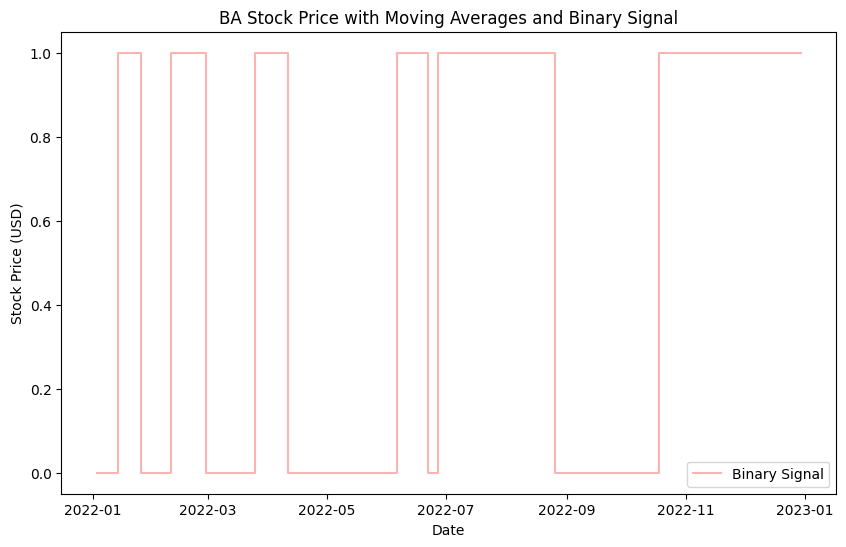

In [ ]:
# Create binary signal (1 when short MA > long MA, 0 otherwise)
stock['Signal'] = 0
stock.loc[stock['Short_MA'] > stock['Long_MA'], 'Signal'] = 1

# Plotting the time series with binary signal as a step plot
plt.figure(figsize=(10, 6))

plt.step(stock.index, stock['Signal'], where='post', label='Binary Signal', color='red', alpha=0.3)

plt.title(f'{symbol} Stock Price with Moving Averages and Binary Signal')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

Step 4: ASk from ChatGPT

calculate Moving Average, Stochastic Oscillator and Rate Of Change of price

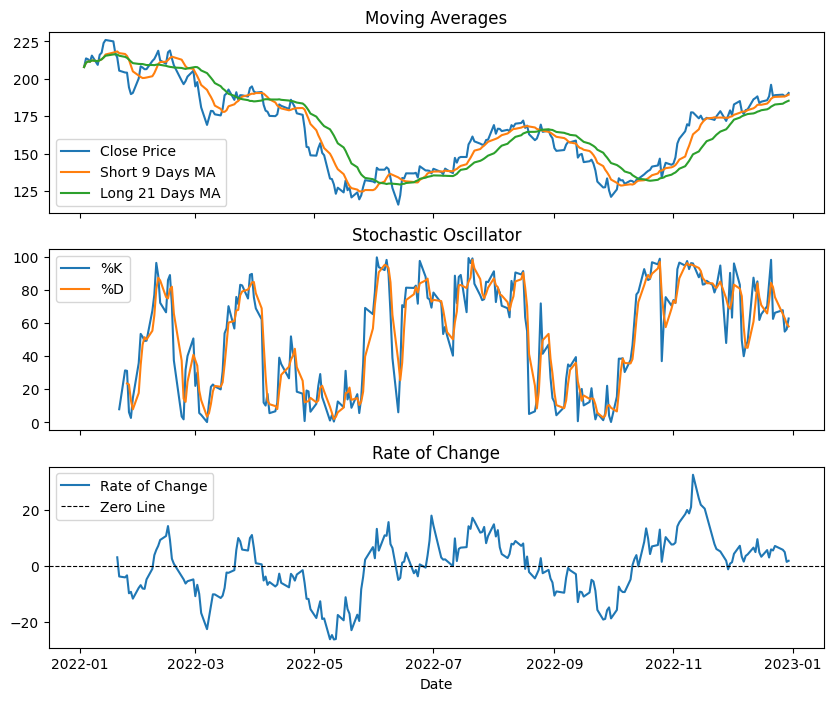

In [ ]:
# Calculate Stochastic Oscillator
n = 14  # Number of periods for %K and %D
stock['Lowest_Low'] = stock['Low'].rolling(window=n).min()
stock['Highest_High'] = stock['High'].rolling(window=n).max()

stock['%K'] = ((stock['Close'] - stock['Lowest_Low']) / (stock['Highest_High'] - stock['Lowest_Low'])) * 100
stock['%D'] = stock['%K'].rolling(window=3).mean()

# Calculate Rate of Change (ROC)
n = 12  # Number of periods for ROC
stock['ROC'] = (stock['Close'] / stock['Close'].shift(n) - 1) * 100

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), sharex=True)

# Plot Moving Averages
axes[0].plot(stock['Close'], label='Close Price')
axes[0].plot(stock['Short_MA'], label=f'Short {short_window} Days MA')
axes[0].plot(stock['Long_MA'], label=f'Long {long_window} Days MA')
axes[0].set_title('Moving Averages')
axes[0].legend()

# Plot Stochastic Oscillator
axes[1].plot(stock['%K'], label='%K')
axes[1].plot(stock['%D'], label='%D')
axes[1].set_title('Stochastic Oscillator')
axes[1].legend()

# Plot Rate of Change
axes[2].plot(stock['ROC'], label='Rate of Change')
axes[2].axhline(0, color='black', linestyle='--', linewidth=0.8, label='Zero Line')
axes[2].set_title('Rate of Change')
axes[2].legend()

plt.xlabel('Date')
plt.show()


We begin by the constructing a dataset that contains the predictors which will be used to make the predictions, and the output variable.

The current Data of the bicoin consists of date, open, high, low, close and Volume. Using this data we calculate the following  technical indicators:
* **Moving Average** : A moving average provides an indication of the trend of the price movement by cut down the amount of "noise" on a price chart.
* **Stochastic Oscillator %K and %D** : A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. %K and %D are slow and fast indicators.
* **Relative Strength Index(RSI)** :It is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.
* **Rate Of Change(ROC)**: It is a momentum oscillator, which measures the percentage change between the current price and the n period past price.
* **Momentum (MOM)** : It is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing.

#### Detais of momentum indicators
Using this data, we calculate the following momentum indicators:

### Moving average
A moving average provides an indication of a price trend by cutting down the
amount of noise in the series.

### Stochastic oscillator %K
A stochastic oscillator is a momentum indicator that compares the closing price
of a security to a range of its previous prices over a certain period of time. %K and %D are slow and fast indicators. The fast indicator is more sensitive than the slow indicator to changes in the price of the underlying security and will likely result in many transaction signals.

###  Relative strength index (RSI)
This is a momentum indicator that measures the magnitude of recent price
changes to evaluate overbought or oversold conditions in the price of a stock or
other asset. The RSI ranges from 0 to 100. An asset is deemed to be overbought
once the RSI approaches 70, meaning that the asset may be getting overvalued
and is a good candidate for a pullback. Likewise, if the RSI approaches 30, it is an indication that the asset may be getting oversold and is therefore likely to become undervalued.

###  Rate of change (ROC)
This is a momentum oscillator that measures the percentage change between the
current price and the n period past prices. Assets with higher ROC values are
considered more likely to be overbought; those with lower ROC, more likely to
be oversold.

# Train Test Split

Step 5: ASk from ChatGPT

use  binary signal as dependent and 1-5 lag information of Moving Average, Stochastic Oscillator and Rate Of Change of price as predictors and create time series splitting training and test sets based on time 80% for training set with TimeSeriesSplit

In [ ]:
# Create lagged features
lag_periods = 5
for i in range(1, lag_periods + 1):
    stock[f'Short_MA_Lag_{i}'] = stock['Short_MA'].shift(i)
    stock[f'Long_MA_Lag_{i}'] = stock['Long_MA'].shift(i)
    stock[f'%K_Lag_{i}'] = stock['%K'].shift(i)
    stock[f'%D_Lag_{i}'] = stock['%D'].shift(i)
    stock[f'ROC_Lag_{i}'] = stock['ROC'].shift(i)

# Drop rows with NaN values due to lag
stock.dropna(inplace=True)

# Splitting into training and test sets using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(stock):
    train_set = stock.iloc[train_index]
    test_set = stock.iloc[test_index]

# Separate features and target variable
X_train = train_set.iloc[:, 11:]  # Select columns from 11th column onwards as predictors
y_train = train_set['Signal']

X_test = test_set.iloc[:, 11:]
y_test = test_set['Signal']



# Decision Tree

Step 6: ASk from ChatGPT

give me code for decision tree with given traning and test sets X_train y_train X_test y_test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create Decision Tree model and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.97

Confusion Matrix:
[[ 0  0]
 [ 1 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.99        38

    accuracy                           0.97        38
   macro avg       0.50      0.49      0.49        38
weighted avg       1.00      0.97      0.99        38



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Step 7: ASk from ChatGPT


give me code for confusion matrix precision, recall,

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_test and y_pred are already defined

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)



Confusion Matrix:
[[ 0  0]
 [ 1 37]]

Precision: 1.0
Recall: 0.9736842105263158


ASk from ChatGPT

Step 8: give me code for Evaluating the model with Confusion matrix, explain precision, recall,

In [ ]:
# Compute confusion matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np

# Assuming you have the following datasets and models
# X_train, y_train, X_test, y_test, dt_model are already defined

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[ 0  0]
 [ 1 37]]

Precision: 1.0
Recall: 0.9736842105263158
Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.97      0.99        38

    accuracy                           0.97        38
   macro avg       0.50      0.49      0.49        38
weighted avg       1.00      0.97      0.99        38



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ASk from ChatGPT

Step 9: give me ROC plot

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


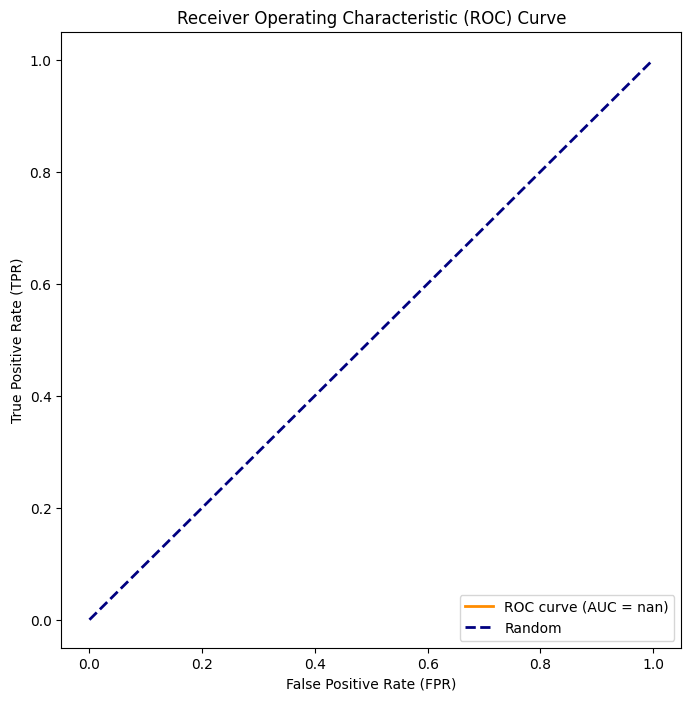

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the following datasets and models
# X_train, y_train, X_test, y_test, dt_model are already defined

# Train the model
dt_model.fit(X_train, y_train)

# Predict probabilities for positive class
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Step 10: ASk from ChatGPT

give visualization of decision tree

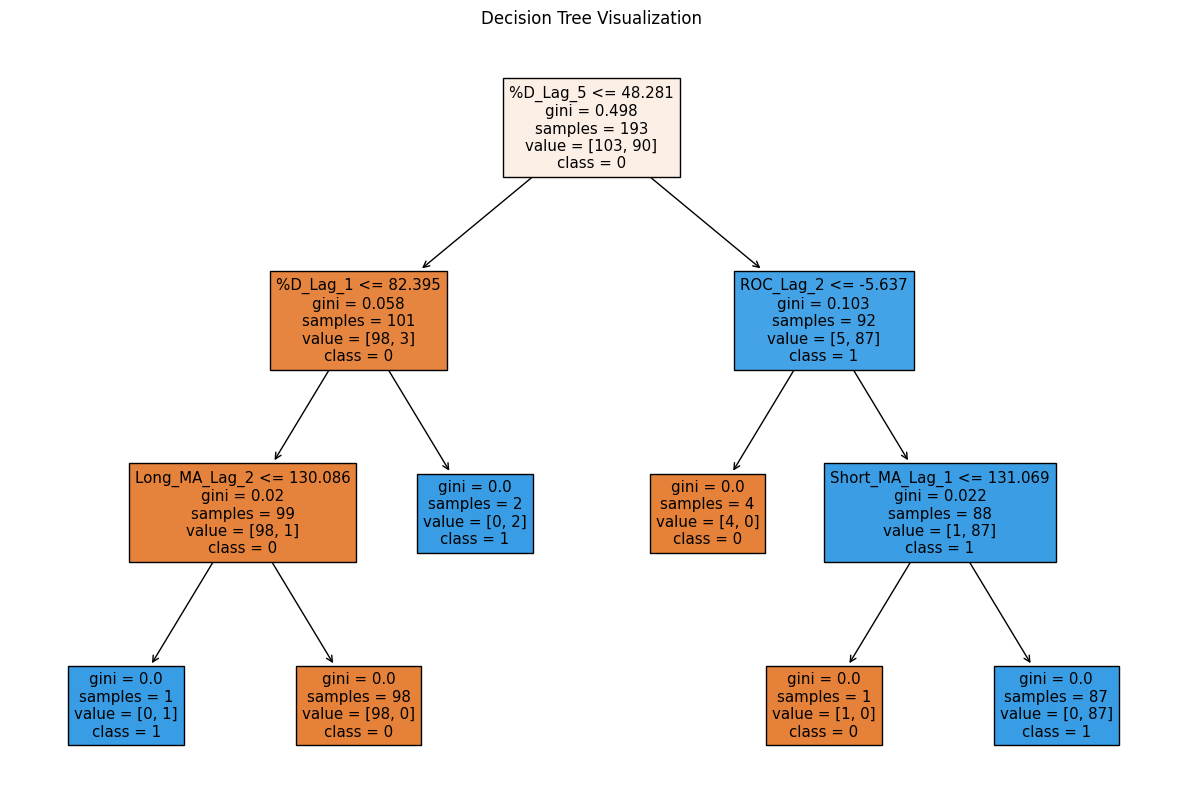

In [ ]:
# Plot Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have the following datasets and models
# X_train, y_train, X_test, y_test, dt_model are already defined

# Train the model
dt_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=["0", "1"])
plt.title("Decision Tree Visualization")
plt.show()


# Q1

 Q1)

List the advantages and limitations of decision tree

# Random forest classifiers

Step 11: ASk from ChatGPT

give me code for random forest  classifier model with given traning and test sets X_train y_train X_test y_test and plots importance variables

Step 12: ASk from ChatGPT

give me ROC plot of above model

# Q2

Q2):

explain the Random Forest classifier in simple words

## Random Forest Classifier:


### Summary of the project




ASk from ChatGPT

give me literature about algorithm trading with above method

# Q3


ASk from ChatGPT

Q4) Explain why we should spilit time series data into test and training based on the time and not randomly

# Q4



Q5) write a summary of above code abou algorithm trading

# Extra

ASk from ChatGPT

Create PowerPoint slides with Python about the above algorithm trading method, including plots of the price of the decision tree codes and explaining all steps in details

In [ ]:
!pip install matplotlib python-pptx
!pip install reportlab matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.9 MB/s eta 0:00:00


In [ ]:
from pptx import Presentation
from pptx.util import Inches

# Create a presentation object
prs = Presentation()

# Slide 1: Title
slide_1 = prs.slides.add_slide(prs.slide_layouts[0])
title = slide_1.shapes.title
title.text = "Algorithmic Trading with Random Forest"

# Slide 2: Introduction
slide_2 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_2.shapes.title
content = slide_2.shapes.placeholders[1]
title.text = "Introduction"
content.text = "Algorithmic trading involves using machine learning to make trading decisions. In this presentation, we'll focus on Random Forest."

# Slide 3: Data Preparation
slide_3 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_3.shapes.title
content = slide_3.shapes.placeholders[1]
title.text = "Data Preparation"
content.text = "Collect historical stock price data and calculate features, including moving averages and technical indicators."

# Slide 4: Feature Engineering
slide_4 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_4.shapes.title
content = slide_4.shapes.placeholders[1]
title.text = "Feature Engineering"
content.text = "Create relevant features such as lagged data and sentiment analysis scores."

# Slide 5: Data Normalization
slide_5 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_5.shapes.title
content = slide_5.shapes.placeholders[1]
title.text = "Data Normalization"
content.text = "Normalize or scale the data to ensure all features have similar magnitudes."

# Add more slides for subsequent steps

# Save the presentation
prs.save("algorithmic_trading_presentation.pptx")



explain codes and trading strategy inside slides

In [ ]:
from pptx import Presentation
from pptx.util import Inches

# Create a presentation object
prs = Presentation()

# Slide 1: Title
slide_1 = prs.slides.add_slide(prs.slide_layouts[0])
title = slide_1.shapes.title
title.text = "Algorithmic Trading with Random Forest"

# Slide 2: Introduction
slide_2 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_2.shapes.title
content = slide_2.shapes.placeholders[1]
title.text = "Introduction"
content.text = "Algorithmic trading involves using machine learning to make trading decisions. In this presentation, we'll focus on Random Forest."

# Slide 3: Data Preparation
slide_3 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_3.shapes.title
content = slide_3.shapes.placeholders[1]
title.text = "Data Preparation"
content.text = "Collect historical stock price data and calculate features, including moving averages and technical indicators."

# Slide 4: Feature Engineering
slide_4 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_4.shapes.title
content = slide_4.shapes.placeholders[1]
title.text = "Feature Engineering"
content.text = "Create relevant features such as lagged data and sentiment analysis scores."

# Slide 5: Data Normalization
slide_5 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_5.shapes.title
content = slide_5.shapes.placeholders[1]
title.text = "Data Normalization"
content.text = "Normalize or scale the data to ensure all features have similar magnitudes."

# Continue adding slides for subsequent steps with explanations and code snippets

# Slide X: Trading Strategy
slide_x = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_x.shapes.title
content = slide_x.shapes.placeholders[1]
title.text = "Trading Strategy"
content.text = "Our trading strategy involves using a Random Forest classifier to predict buy/sell signals based on technical indicators and historical price data. The classifier considers factors such as moving averages, Stochastic Oscillator, and Rate of Change."

# Slide X+1: Decision Tree Code
slide_x_plus_1 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_x_plus_1.shapes.title
content = slide_x_plus_1.shapes.placeholders[1]
title.text = "Decision Tree Code"
content.text = "Here is a snippet of the Python code used to train a Decision Tree classifier for our trading strategy."

# Include the code snippet within the content area

# Slide X+2: Backtesting and Evaluation
slide_x_plus_2 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_x_plus_2.shapes.title
content = slide_x_plus_2.shapes.placeholders[1]
title.text = "Backtesting and Evaluation"
content.text = "We backtest our trading strategy to assess its performance. This involves simulating trading decisions based on historical data. Various metrics are used to evaluate the strategy's success."

# Slide X+3: Results and Conclusion
slide_x_plus_3 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_x_plus_3.shapes.title
content = slide_x_plus_3.shapes.placeholders[1]
title.text = "Results and Conclusion"
content.text = "The trading strategy's performance is analyzed, and a conclusion is drawn. We also consider factors like risk management and the need for real-time adaptation in dynamic financial markets."

# Save the presentation
prs.save("algorithmic_trading_presentation.pptx")
